In [2]:
import cv2
from skimage.measure import label, regionprops
from skimage import io, measure, color
from skimage.filters import threshold_otsu
import os
import tifffile
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread, imsave
from scipy.ndimage import center_of_mass
from PIL import Image
import re

In [3]:
#load the mask data
mask_data_15_percent = "A:/3rd_Year_Project/Project_code/data/Masks-20250217T234515Z-001/Masks/15percent_masks"
mask_data_2nd_with_light = "A:/3rd_Year_Project/Project_code/data/Masks-20250217T234515Z-001/Masks/secondwithlight_masks"

In [6]:
# Step 1: Load the greyscale image
image_path = "A:/3rd_Year_Project/Project_code/data/Masks-20250217T234155Z-001/Masks/secondwithlight_masks/"
output_folder = "A:/3rd_Year_Project/Project_code/data/Seperated_mask_data"

#for image in os.listdir(image_path):
for image_filename in os.listdir(image_path):
    image_path_full = os.path.join(image_path, image_filename)
    image = io.imread(image_path_full)  # Read the current image
    #image = io.imread(os.path.join(image_path, "0000.png"))  # Replace with your image file name

    # Check if the image has an alpha channel (RGBA)
    if image.ndim == 3:
        if image.shape[2] == 4:  # Check if it's an RGBA image
            image = image[:, :, :3]  # Remove the alpha channel (keep only RGB)

        image = color.rgb2gray(image)  # Convert RGB to grayscale

    # Check if the image is grayscale
    #if len(image.shape) > 2:
    #   image = color.rgb2gray(image)  # Convert RGB to grayscale

    # Step 2: Threshold the image (if needed)
    # Here, we are using Otsu's method for automatic thresholding
    threshold_value = threshold_otsu(image)
    binary_image = image > threshold_value

    # Step 3: Label the regions
    label_image = measure.label(binary_image)

    # Step 4: Extract region properties
    regions = measure.regionprops(label_image)
    original_name = str(int(os.path.splitext(image_filename)[0]))  # Remove leading zeros  # Extract filename without extension
    #output_image_path = os.path.join(output_folder, f"{original_name}_region_{i}.png")

    if not os.path.exists(output_folder):  # If the folder does not exist, create it
        os.makedirs(output_folder)

    # Step 5: Create new images with only one shade
    # For each unique region, create a new image with just that region's pixels set
    for i, region in enumerate(regions):
        minr, minc, maxr, maxc = region.bbox
        # Create an empty image for each region
        region_image = np.zeros_like(image)
        region_image[minr:maxr, minc:maxc] = binary_image[minr:maxr, minc:maxc]

        # Step 6: Save the new image with only one shade
        region_image_uint8 = (region_image * 255).astype(np.uint8)
        output_image_path = os.path.join(output_folder, f"{original_name}_region_{i}.png")
        io.imsave(output_image_path, region_image_uint8)

        # Display the region image
        #plt.figure(figsize=(5, 5))
        #plt.imshow(region_image, cmap='gray')
        #plt.title(f'Region {i}')
        #plt.show()

A:\3rd_Year_Project\Anaconda\envs\lizard\lib\site-packages\skimage\_shared\utils.py:328: UserWarning: A:/3rd_Year_Project/Project_code/data/Seperated_mask_data\0_region_0.png is a low contrast image
  return func(*args, **kwargs)
A:\3rd_Year_Project\Anaconda\envs\lizard\lib\site-packages\skimage\_shared\utils.py:328: UserWarning: A:/3rd_Year_Project/Project_code/data/Seperated_mask_data\0_region_1.png is a low contrast image
  return func(*args, **kwargs)
A:\3rd_Year_Project\Anaconda\envs\lizard\lib\site-packages\skimage\_shared\utils.py:328: UserWarning: A:/3rd_Year_Project/Project_code/data/Seperated_mask_data\0_region_2.png is a low contrast image
  return func(*args, **kwargs)
A:\3rd_Year_Project\Anaconda\envs\lizard\lib\site-packages\skimage\_shared\utils.py:328: UserWarning: A:/3rd_Year_Project/Project_code/data/Seperated_mask_data\0_region_3.png is a low contrast image
  return func(*args, **kwargs)
A:\3rd_Year_Project\Anaconda\envs\lizard\lib\site-packages\skimage\_shared\utils

In [7]:
#original_name = os.path.splitext(image)[0]  # Get the base name without extension
#output_image_path = os.path.join(output_folder, f"{original_name}_region_{i}.png")

In [8]:
#time to load in the actual data
#time to load in the actual data
# Step 6: Create the folder for saving the results of multiplication
result_folder = "A:/3rd_Year_Project/Project_code/data/Masks-20250217T234155Z-001/Masks/Isolated_NOT_resized_amoeba/"
if not os.path.exists(result_folder):  # If the folder does not exist, create it
    os.makedirs(result_folder)

# Step 7: Load the first image from "secondwithlight_MMStack_Default.ome" directory
ome_image_path = r"A:\3rd_Year_Project\Project_code\data\Data-20250217T234725Z-002\Data\secondwithlight_MMStack_Default.ome.tif"
output_path = r"A:\3rd_Year_Project\Project_code\data\Raw_data"
if not os.path.exists(output_path):  # If the folder does not exist, create it
    os.makedirs(output_path)

with tifffile.TiffFile(ome_image_path) as tif:
    # Create a list to hold the odd-numbered images
    odd_images = []

    # Loop through all pages (images) and extract odd-numbered ones
    for i, page in enumerate(tif.pages):
        if i % 2 == 0:  # Odd-indexed images (0-based indexing, i.e., 0, 2, 4,...)
            image = page.asarray()

            # Define the filename for each odd image
            output_filename = os.path.join(output_path, f"odd_image_{i//2}.png")

            # Save the image as a .png file
            imsave(output_filename, image)

            #print(f"Saved odd image {i//2 + 1} as: {output_filename}")

            # Display the odd-numbered image
            #plt.figure(figsize=(6, 6))
            #plt.imshow(image, cmap='gray')
            #plt.title(f"Odd Image {i+1} from OME File")  # i+1 to show 1-based numbering
            #plt.show()
            
#        if i//2 +1 == 300:
#            break
#print(image)

In [9]:
# Paths
raw_image_path = r"A:\3rd_Year_Project\Project_code\data\Raw_data"
region_images_folder = r"A:\3rd_Year_Project\Project_code\data\Seperated_mask_data"
output_folder = r"A:\3rd_Year_Project\Project_code\data\Masks-20250217T234155Z-001\Masks\Isolated_NOT_resized_amoeba"
resized_output_folder = r"A:\3rd_Year_Project\Project_code\data\Resized_128x128"

# Ensure output folders exist
os.makedirs(output_folder, exist_ok=True)
os.makedirs(resized_output_folder, exist_ok=True)

# Load the images from .png to np.float32
for image_filename in os.listdir(raw_image_path):  # Get all files in the folder
    image_path = os.path.join(raw_image_path, image_filename)

    if image_filename.endswith('.png'):  # Only process PNG files
        image = Image.open(image_path)
        raw_image = np.array(image, dtype=np.float32)  # Convert to float32 for processing
        #print(raw_image.shape)  # Print the shape of each image

In [11]:
#getting all the raw data ready by converting it to a numpy array
raw_image_path = r"A:\3rd_Year_Project\Project_code\data\Raw_data"
image_path = "A:/3rd_Year_Project/Project_code/data/Seperated_mask_data"
output_folder = r"A:\3rd_Year_Project\Project_code\data\Multiplied_Isolated_Not_resized_amoeba"

# List all raw image files (e.g., odd_image_1.png, odd_image_2.png, ...)
raw_files = sorted([f for f in os.listdir(raw_image_path) if f.startswith("odd_image_")])

#print("Raw files found:", raw_files)

# Loop through each raw image file
for raw_file in raw_files:
    # Extract the X value from "odd_image_X.png"
    match = re.search(r"(\d+)", raw_file)
    if not match:
        #print(f"Skipping {raw_file}, no numeric ID found.")
        continue

    raw_id = match.group(1)  # Extracted number as a string
    #print(f"\nProcessing raw image: {raw_file} (ID: {raw_id})")

    # Load the raw image
    raw_image_path_full = os.path.join(raw_image_path, raw_file)
    raw_image = np.array(Image.open(raw_image_path_full))

    # Find mask files corresponding to this raw_id
    matching_masks = sorted([f for f in os.listdir(image_path) if f.startswith(f"{raw_id}_region_")])

    if not matching_masks:
        #print(f"No matching masks found for {raw_file}")
        continue

    #print(f"Matching masks found: {matching_masks}")

    # Loop through matching mask files
    for mask_file in matching_masks:
        mask_image_path_full = os.path.join(image_path, mask_file)

        # Load the mask image
        mask_image = np.array(Image.open(mask_image_path_full))

        # Ensure raw and mask images have the same shape
        if raw_image.shape != mask_image.shape:
            mask_image = np.array(Image.fromarray(mask_image).resize((raw_image.shape[1], raw_image.shape[0]), Image.NEAREST))

        # Multiply the raw image by the mask image (element-wise multiplication)
        result_image = raw_image * mask_image

        # Convert the result back to an image
        result_image = Image.fromarray(result_image.astype(np.uint8))

        # Create output filename
        output_filename = f"result_{raw_file.replace('.png', '')}_{mask_file}"
        output_image_path = os.path.join(output_folder, output_filename)

        # Save the result image
        result_image.save(output_image_path)

        #print(f"Saved: {output_image_path}")

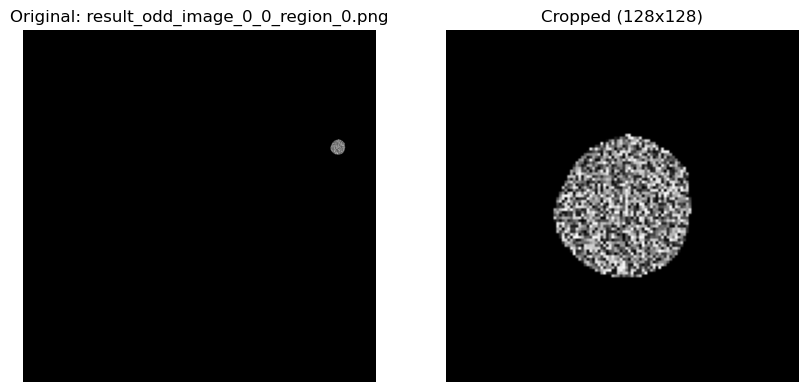

Saved cropped image: A:\3rd_Year_Project\Project_code\data\Resized_128x128\result_odd_image_0_0_region_0.png_cropped.png


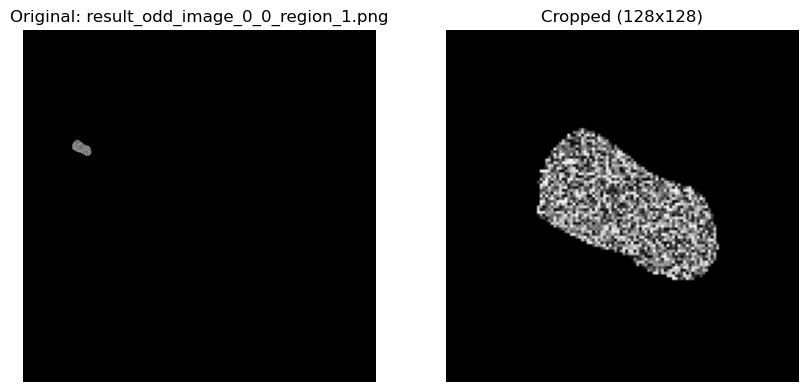

Saved cropped image: A:\3rd_Year_Project\Project_code\data\Resized_128x128\result_odd_image_0_0_region_1.png_cropped.png


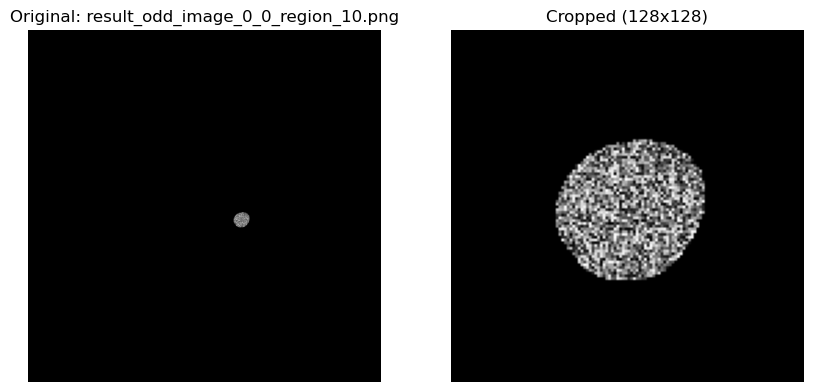

Saved cropped image: A:\3rd_Year_Project\Project_code\data\Resized_128x128\result_odd_image_0_0_region_10.png_cropped.png


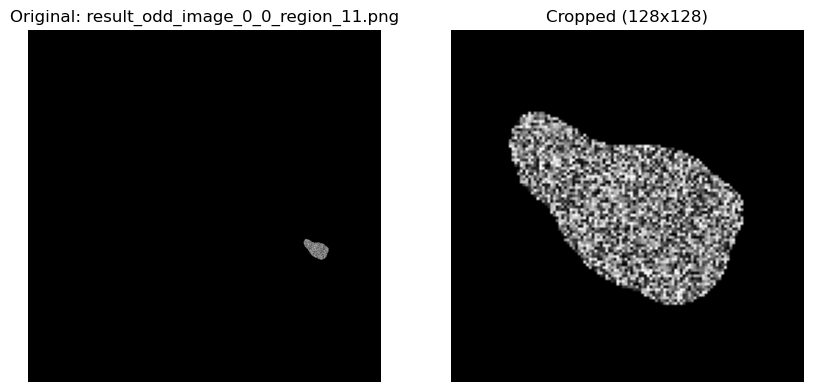

Saved cropped image: A:\3rd_Year_Project\Project_code\data\Resized_128x128\result_odd_image_0_0_region_11.png_cropped.png


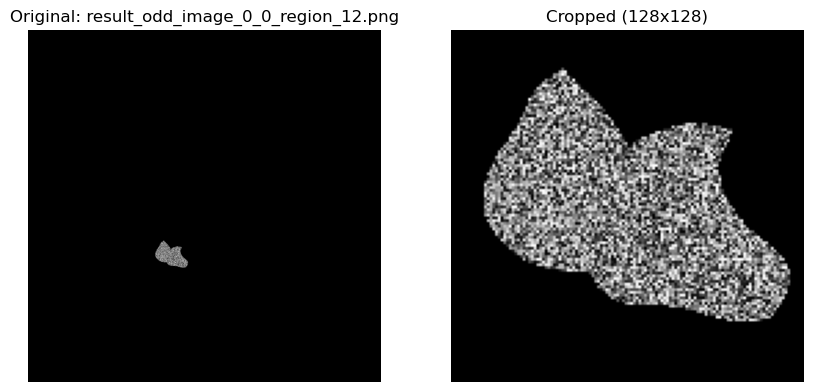

Saved cropped image: A:\3rd_Year_Project\Project_code\data\Resized_128x128\result_odd_image_0_0_region_12.png_cropped.png


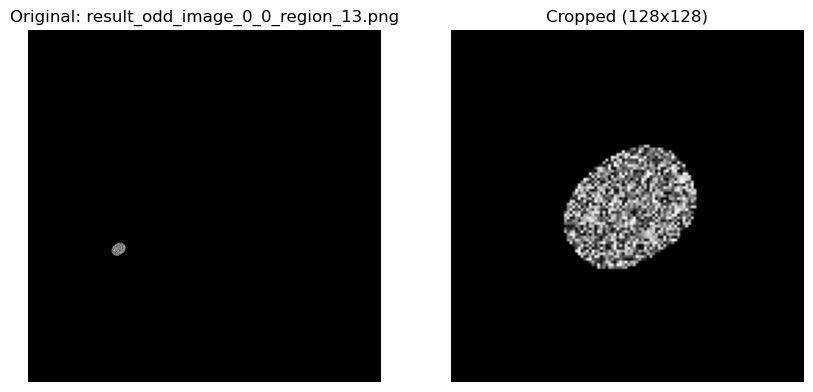

Saved cropped image: A:\3rd_Year_Project\Project_code\data\Resized_128x128\result_odd_image_0_0_region_13.png_cropped.png


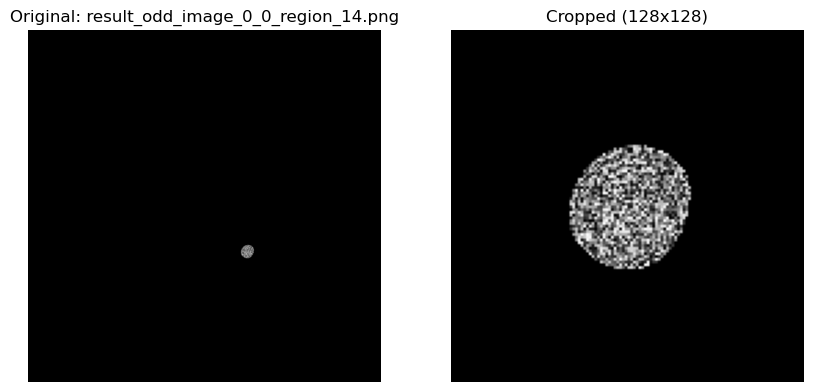

Saved cropped image: A:\3rd_Year_Project\Project_code\data\Resized_128x128\result_odd_image_0_0_region_14.png_cropped.png


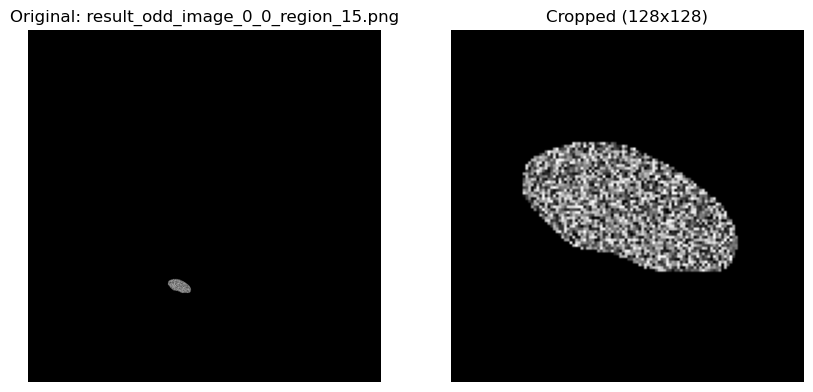

Saved cropped image: A:\3rd_Year_Project\Project_code\data\Resized_128x128\result_odd_image_0_0_region_15.png_cropped.png


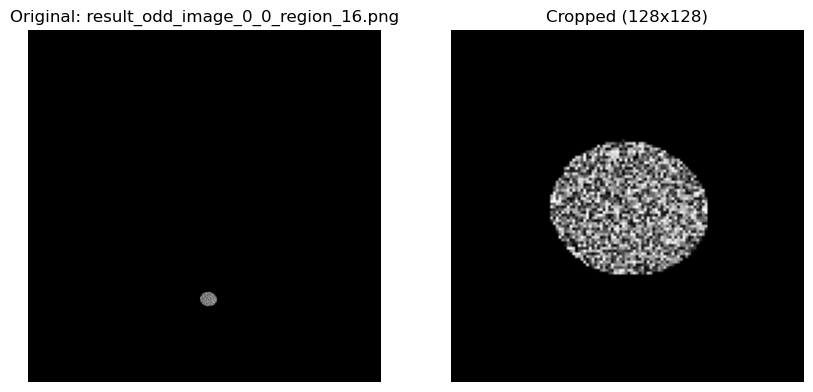

Saved cropped image: A:\3rd_Year_Project\Project_code\data\Resized_128x128\result_odd_image_0_0_region_16.png_cropped.png


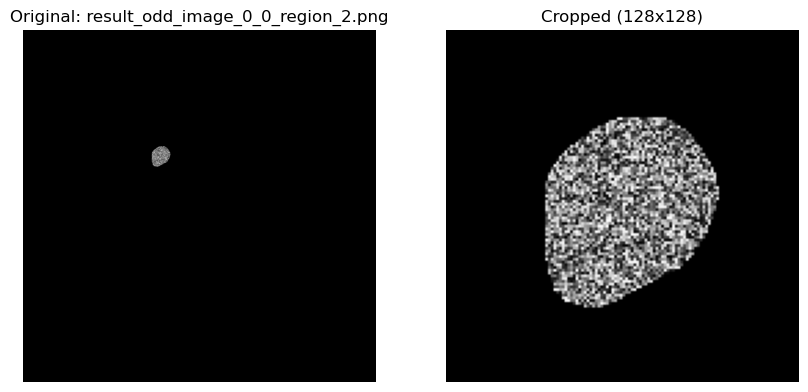

Saved cropped image: A:\3rd_Year_Project\Project_code\data\Resized_128x128\result_odd_image_0_0_region_2.png_cropped.png


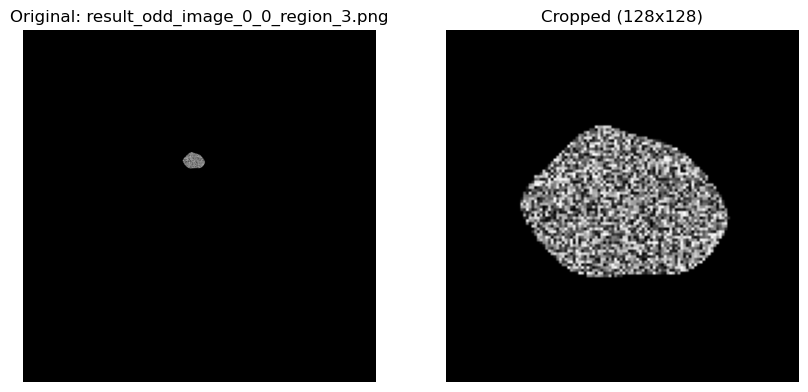

Saved cropped image: A:\3rd_Year_Project\Project_code\data\Resized_128x128\result_odd_image_0_0_region_3.png_cropped.png


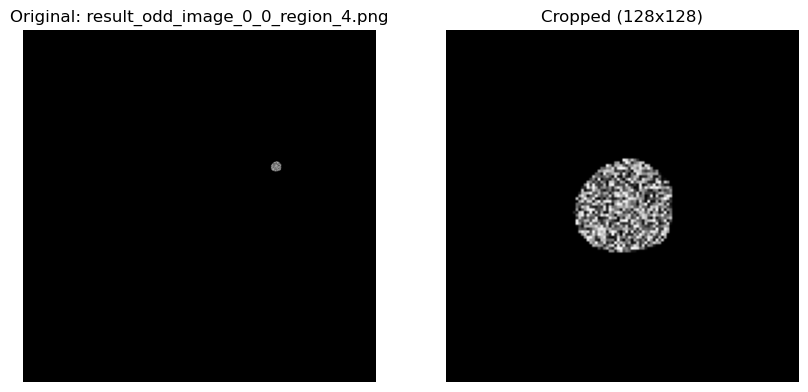

Saved cropped image: A:\3rd_Year_Project\Project_code\data\Resized_128x128\result_odd_image_0_0_region_4.png_cropped.png


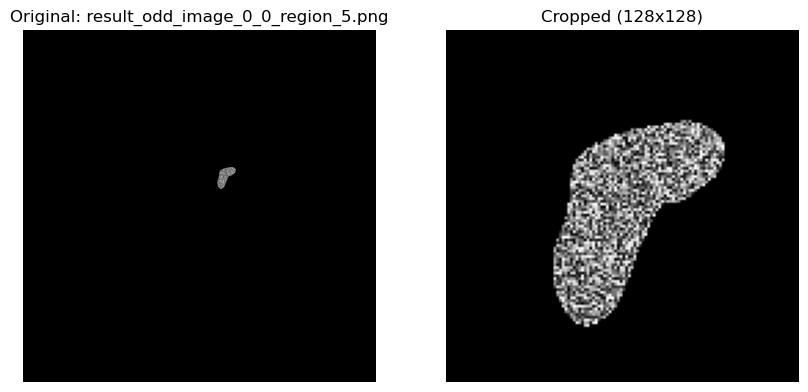

Saved cropped image: A:\3rd_Year_Project\Project_code\data\Resized_128x128\result_odd_image_0_0_region_5.png_cropped.png


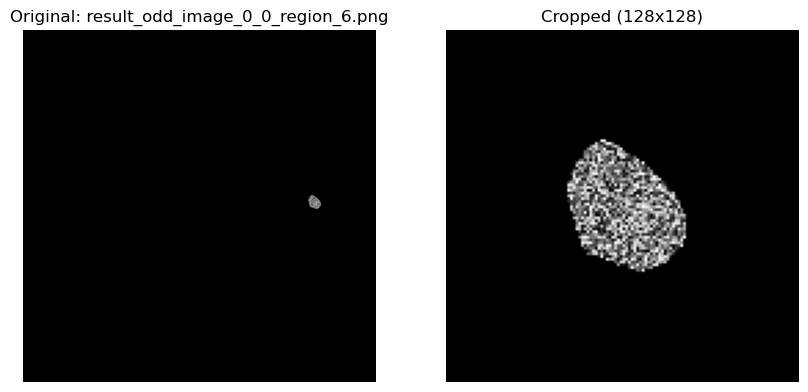

Saved cropped image: A:\3rd_Year_Project\Project_code\data\Resized_128x128\result_odd_image_0_0_region_6.png_cropped.png


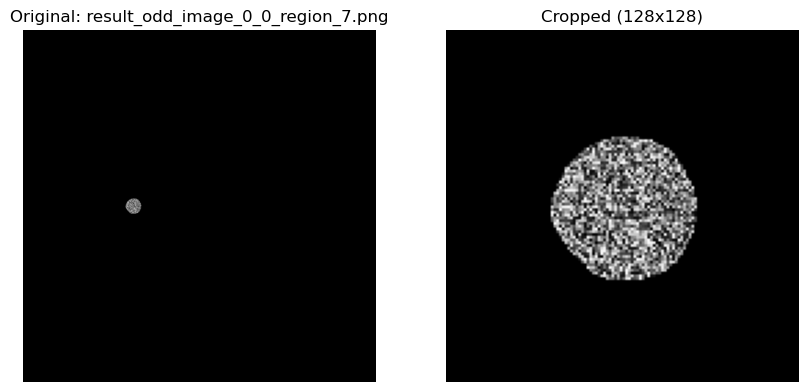

Saved cropped image: A:\3rd_Year_Project\Project_code\data\Resized_128x128\result_odd_image_0_0_region_7.png_cropped.png


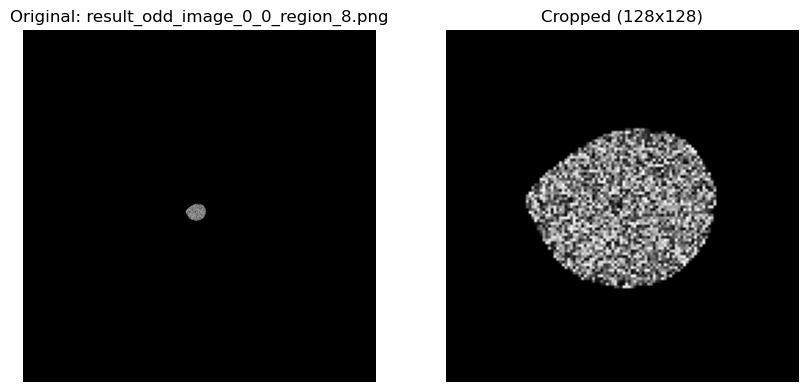

Saved cropped image: A:\3rd_Year_Project\Project_code\data\Resized_128x128\result_odd_image_0_0_region_8.png_cropped.png


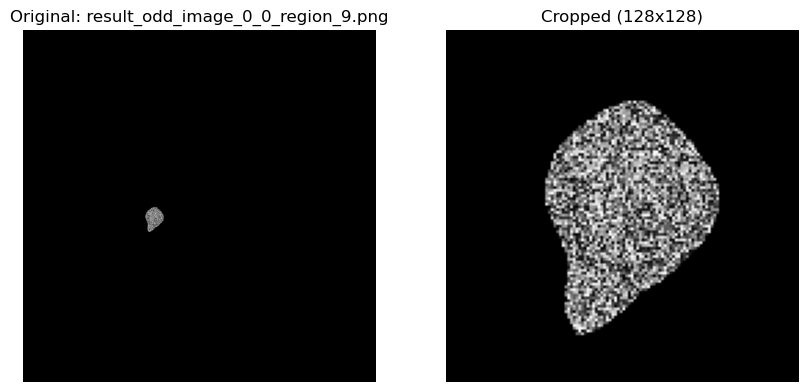

Saved cropped image: A:\3rd_Year_Project\Project_code\data\Resized_128x128\result_odd_image_0_0_region_9.png_cropped.png


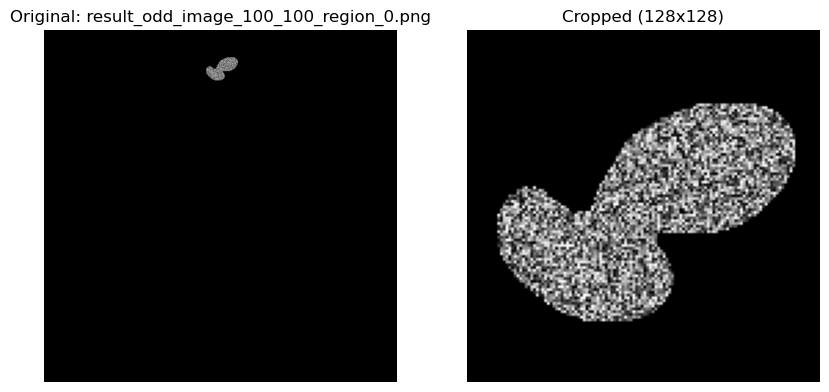

Saved cropped image: A:\3rd_Year_Project\Project_code\data\Resized_128x128\result_odd_image_100_100_region_0.png_cropped.png


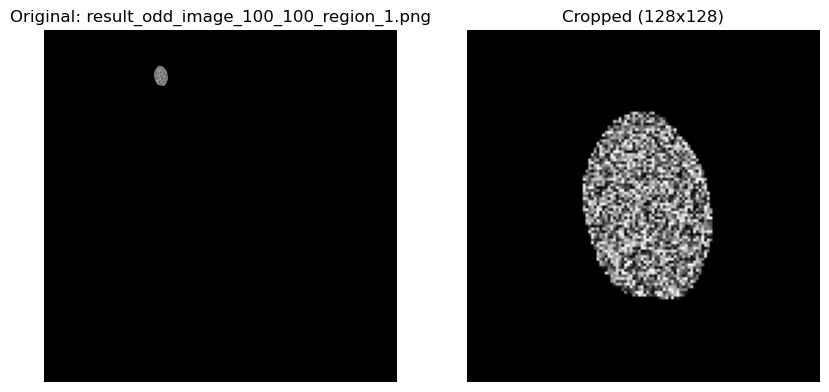

Saved cropped image: A:\3rd_Year_Project\Project_code\data\Resized_128x128\result_odd_image_100_100_region_1.png_cropped.png


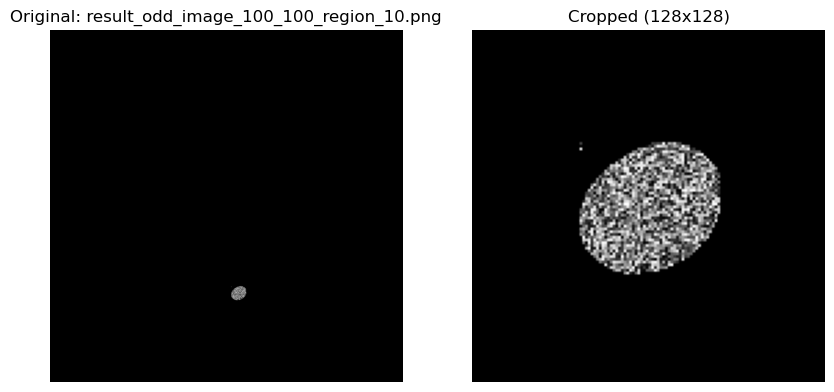

Saved cropped image: A:\3rd_Year_Project\Project_code\data\Resized_128x128\result_odd_image_100_100_region_10.png_cropped.png


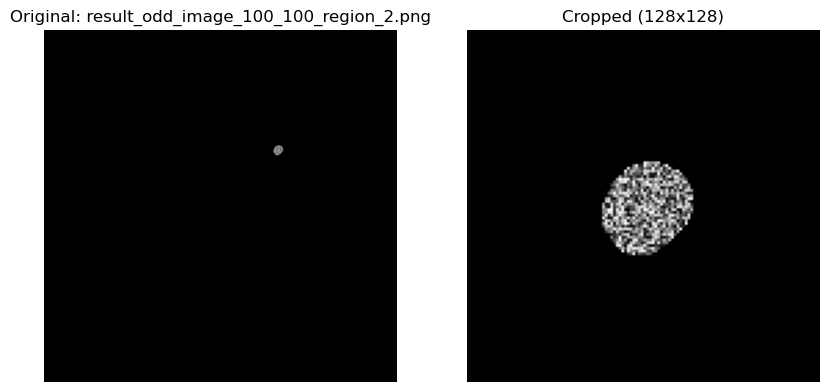

Saved cropped image: A:\3rd_Year_Project\Project_code\data\Resized_128x128\result_odd_image_100_100_region_2.png_cropped.png


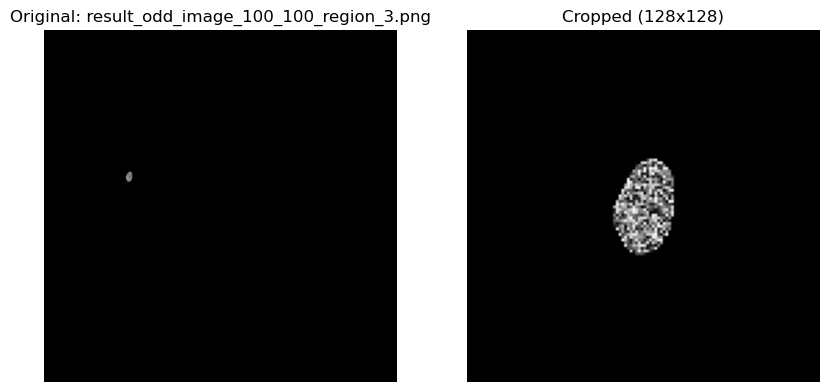

Saved cropped image: A:\3rd_Year_Project\Project_code\data\Resized_128x128\result_odd_image_100_100_region_3.png_cropped.png


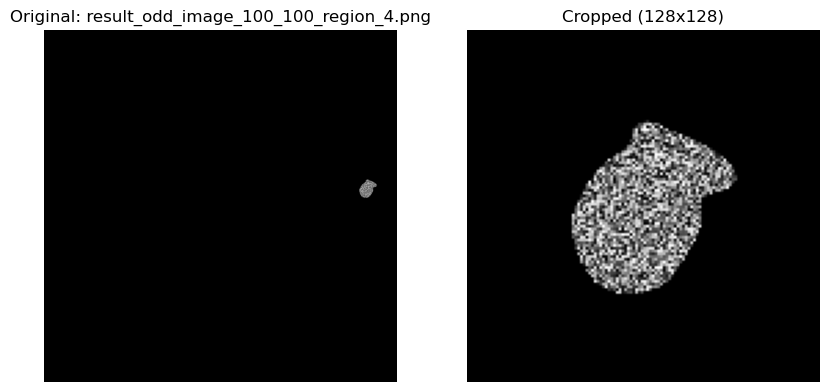

Saved cropped image: A:\3rd_Year_Project\Project_code\data\Resized_128x128\result_odd_image_100_100_region_4.png_cropped.png


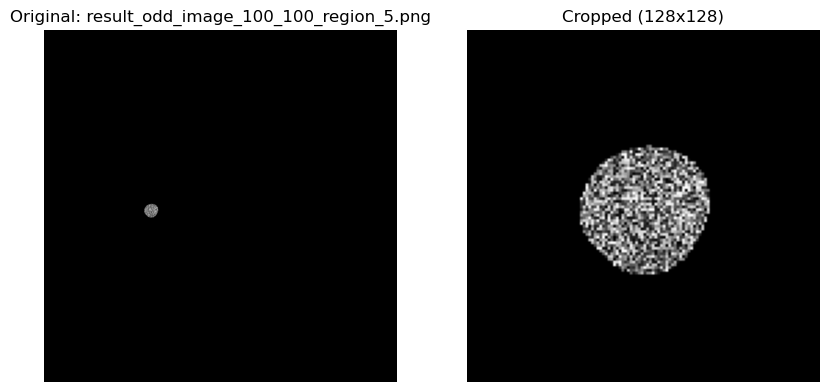

Saved cropped image: A:\3rd_Year_Project\Project_code\data\Resized_128x128\result_odd_image_100_100_region_5.png_cropped.png


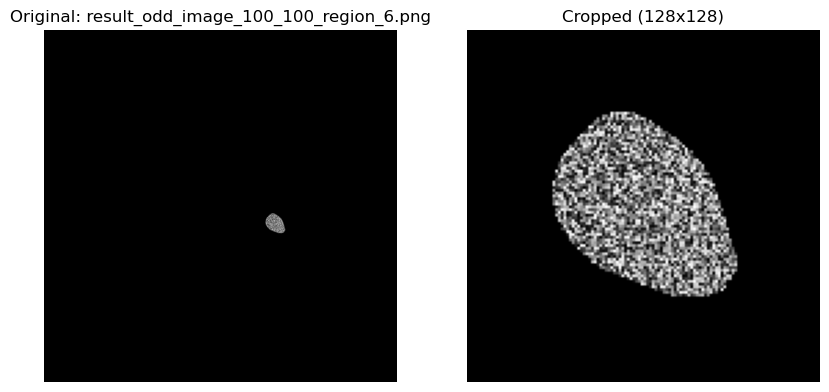

Saved cropped image: A:\3rd_Year_Project\Project_code\data\Resized_128x128\result_odd_image_100_100_region_6.png_cropped.png


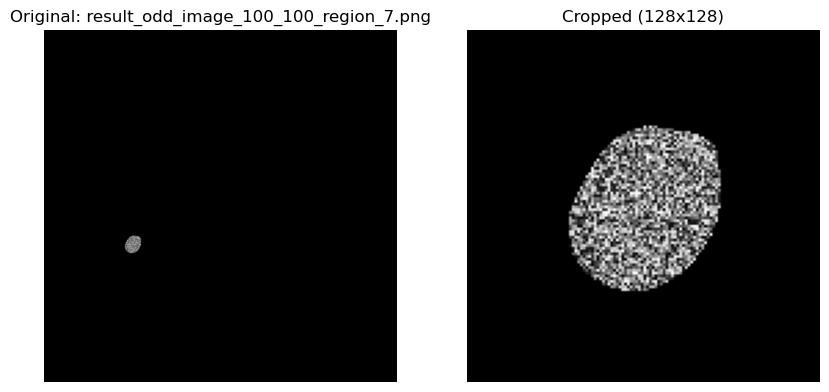

Saved cropped image: A:\3rd_Year_Project\Project_code\data\Resized_128x128\result_odd_image_100_100_region_7.png_cropped.png


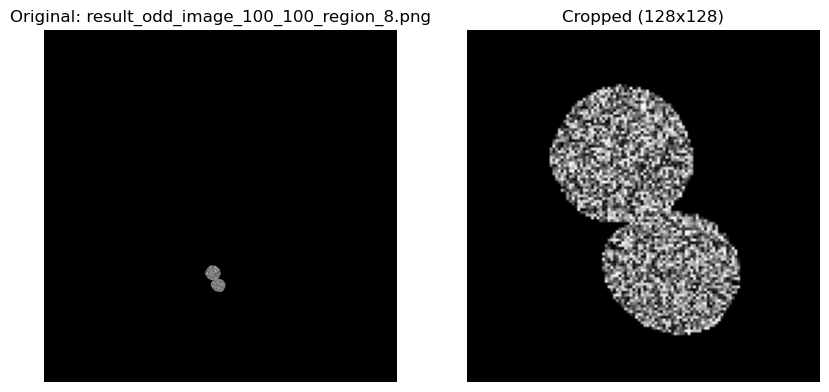

Saved cropped image: A:\3rd_Year_Project\Project_code\data\Resized_128x128\result_odd_image_100_100_region_8.png_cropped.png


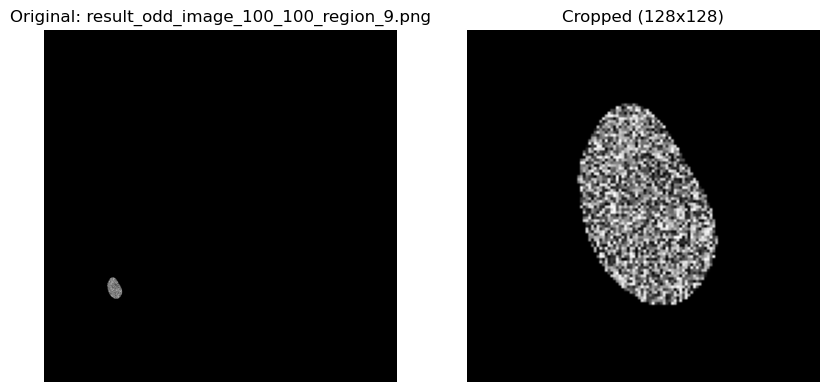

Saved cropped image: A:\3rd_Year_Project\Project_code\data\Resized_128x128\result_odd_image_100_100_region_9.png_cropped.png


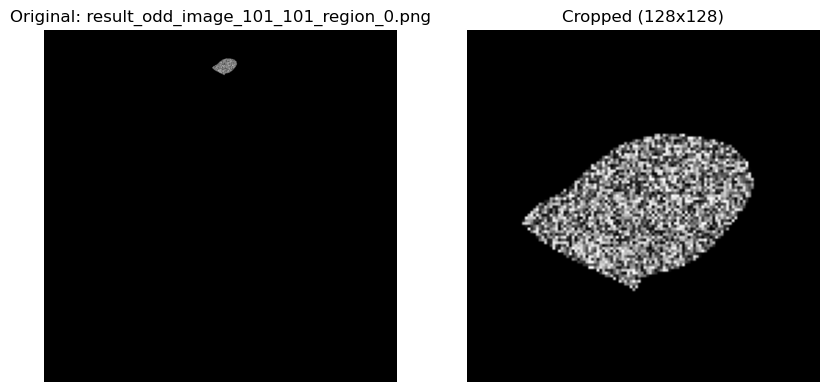

Saved cropped image: A:\3rd_Year_Project\Project_code\data\Resized_128x128\result_odd_image_101_101_region_0.png_cropped.png


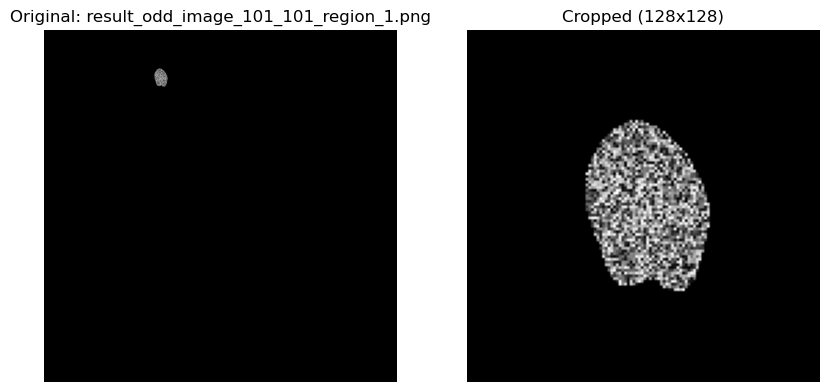

Saved cropped image: A:\3rd_Year_Project\Project_code\data\Resized_128x128\result_odd_image_101_101_region_1.png_cropped.png


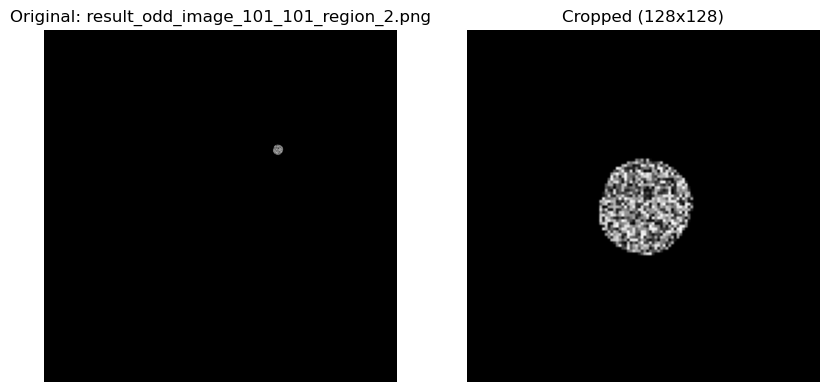

Saved cropped image: A:\3rd_Year_Project\Project_code\data\Resized_128x128\result_odd_image_101_101_region_2.png_cropped.png


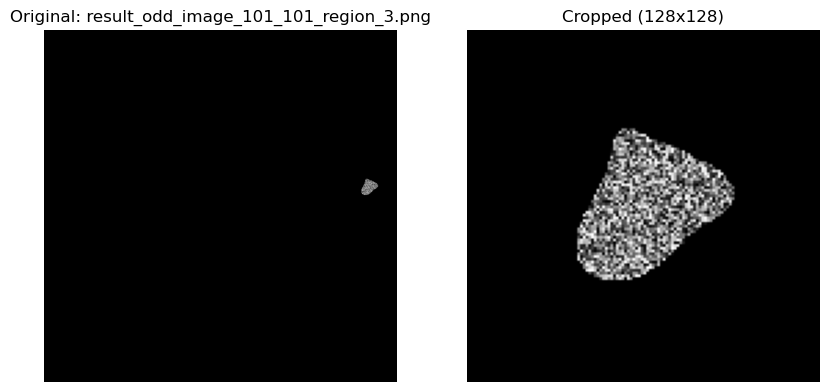

Saved cropped image: A:\3rd_Year_Project\Project_code\data\Resized_128x128\result_odd_image_101_101_region_3.png_cropped.png


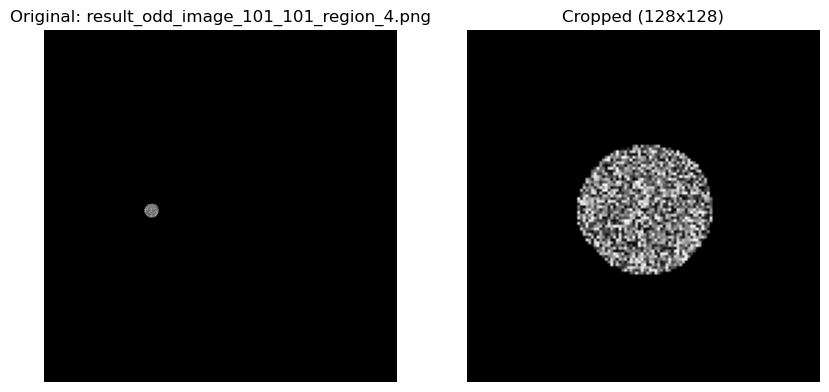

Saved cropped image: A:\3rd_Year_Project\Project_code\data\Resized_128x128\result_odd_image_101_101_region_4.png_cropped.png


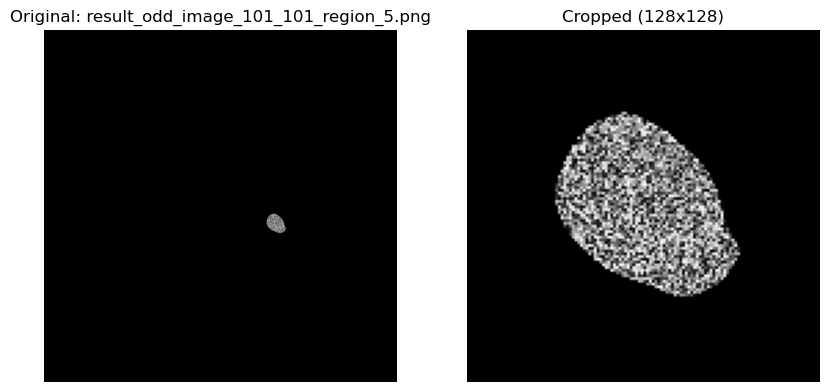

Saved cropped image: A:\3rd_Year_Project\Project_code\data\Resized_128x128\result_odd_image_101_101_region_5.png_cropped.png


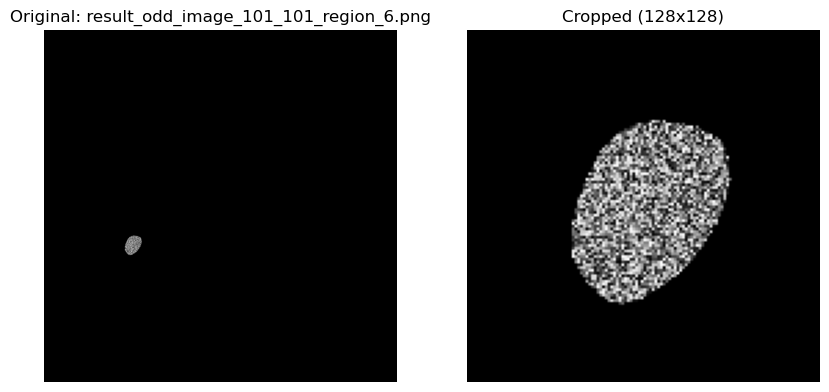

Saved cropped image: A:\3rd_Year_Project\Project_code\data\Resized_128x128\result_odd_image_101_101_region_6.png_cropped.png


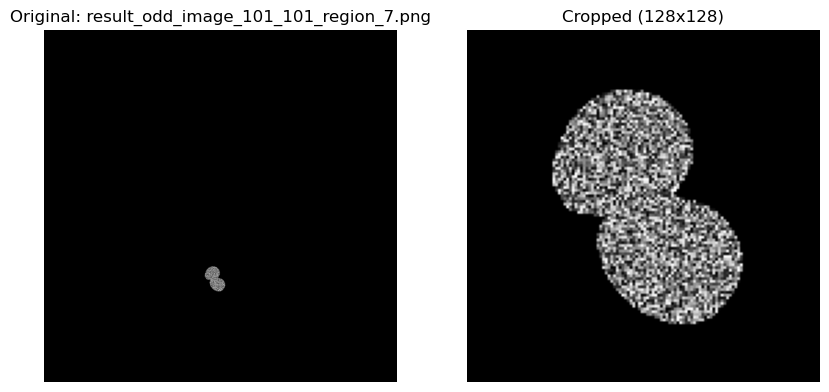

Saved cropped image: A:\3rd_Year_Project\Project_code\data\Resized_128x128\result_odd_image_101_101_region_7.png_cropped.png


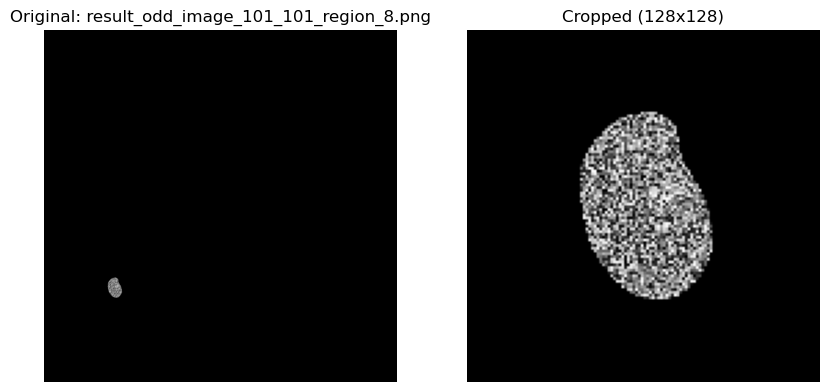

Saved cropped image: A:\3rd_Year_Project\Project_code\data\Resized_128x128\result_odd_image_101_101_region_8.png_cropped.png


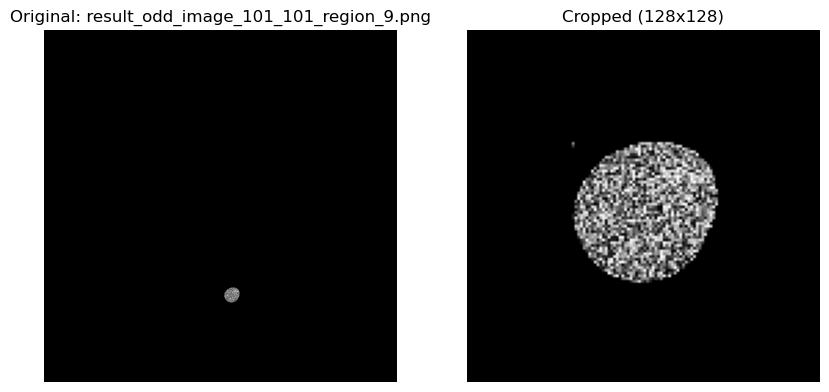

Saved cropped image: A:\3rd_Year_Project\Project_code\data\Resized_128x128\result_odd_image_101_101_region_9.png_cropped.png


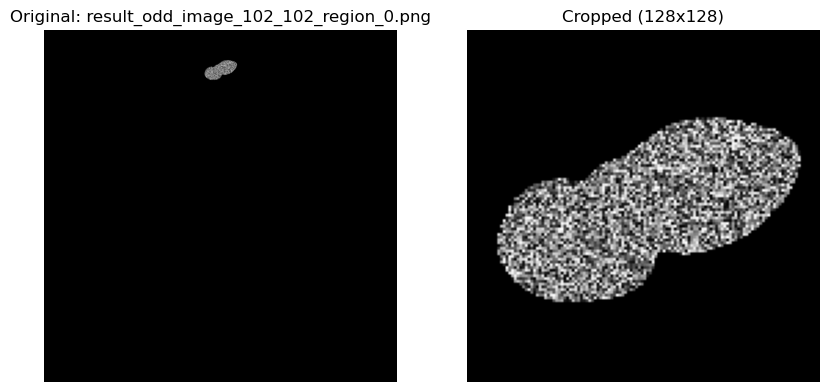

Saved cropped image: A:\3rd_Year_Project\Project_code\data\Resized_128x128\result_odd_image_102_102_region_0.png_cropped.png


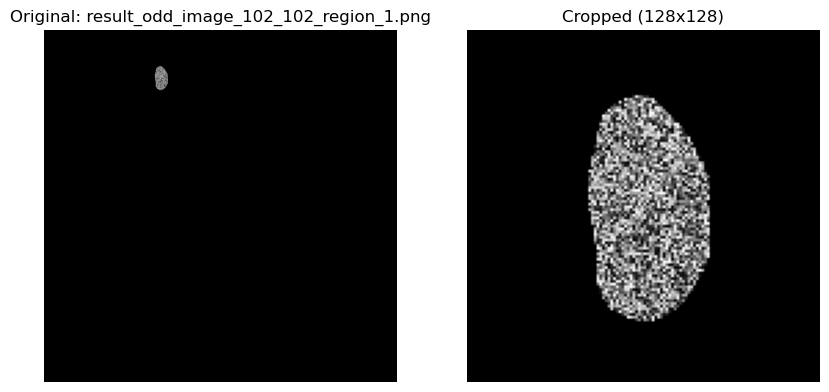

Saved cropped image: A:\3rd_Year_Project\Project_code\data\Resized_128x128\result_odd_image_102_102_region_1.png_cropped.png


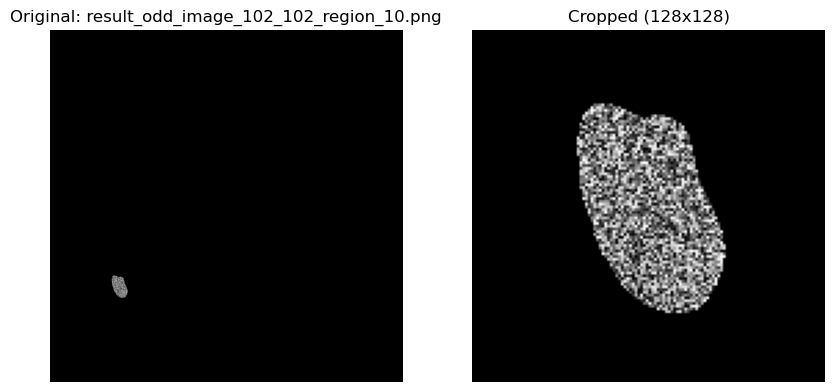

Saved cropped image: A:\3rd_Year_Project\Project_code\data\Resized_128x128\result_odd_image_102_102_region_10.png_cropped.png


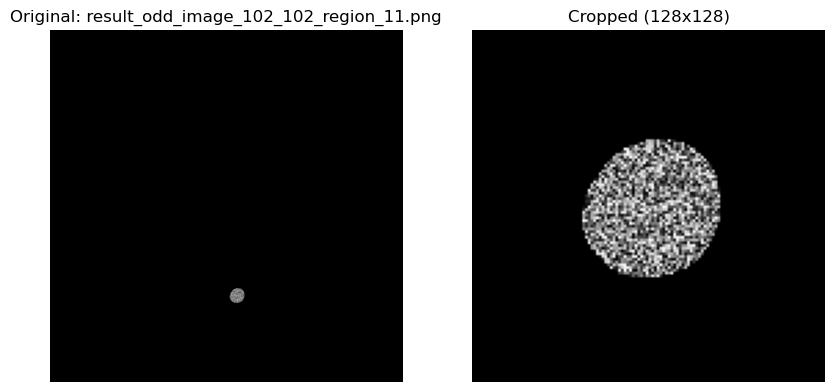

Saved cropped image: A:\3rd_Year_Project\Project_code\data\Resized_128x128\result_odd_image_102_102_region_11.png_cropped.png


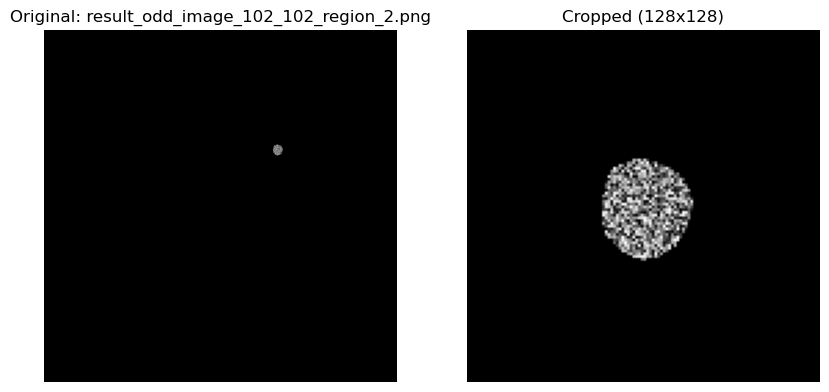

Saved cropped image: A:\3rd_Year_Project\Project_code\data\Resized_128x128\result_odd_image_102_102_region_2.png_cropped.png


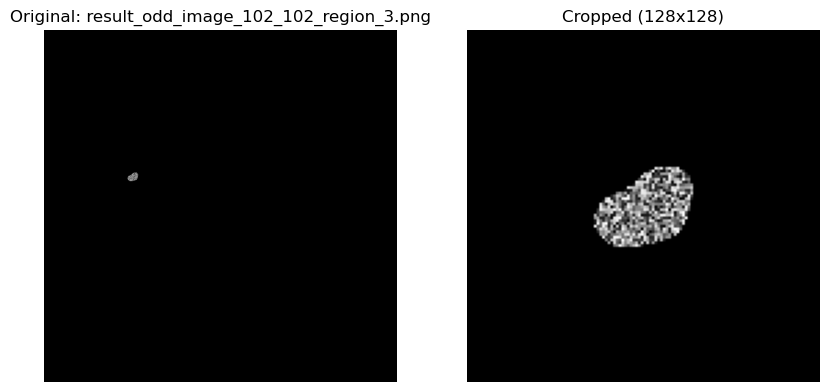

Saved cropped image: A:\3rd_Year_Project\Project_code\data\Resized_128x128\result_odd_image_102_102_region_3.png_cropped.png


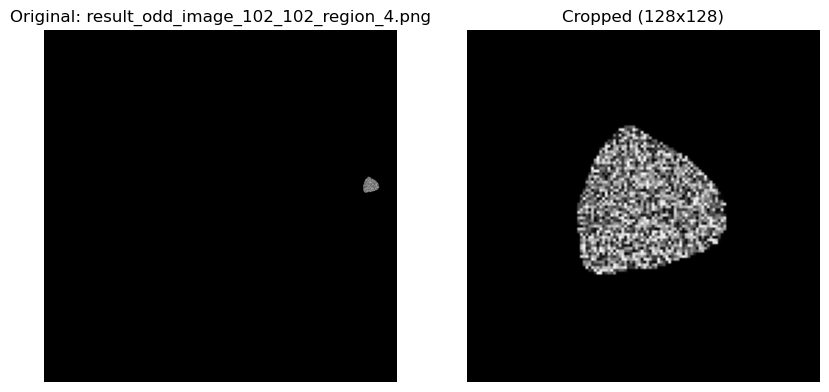

Saved cropped image: A:\3rd_Year_Project\Project_code\data\Resized_128x128\result_odd_image_102_102_region_4.png_cropped.png


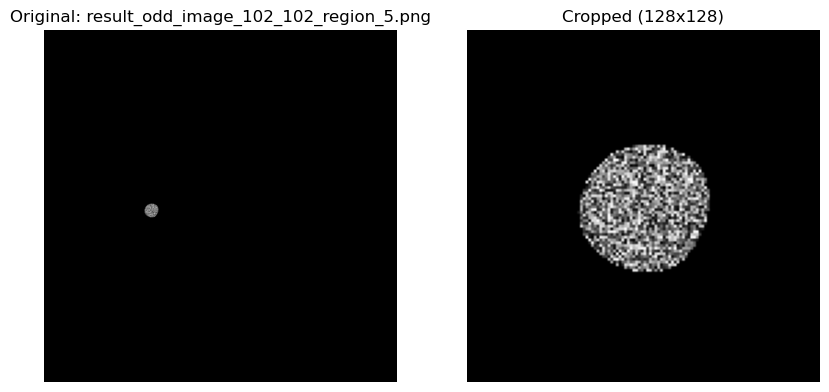

Saved cropped image: A:\3rd_Year_Project\Project_code\data\Resized_128x128\result_odd_image_102_102_region_5.png_cropped.png


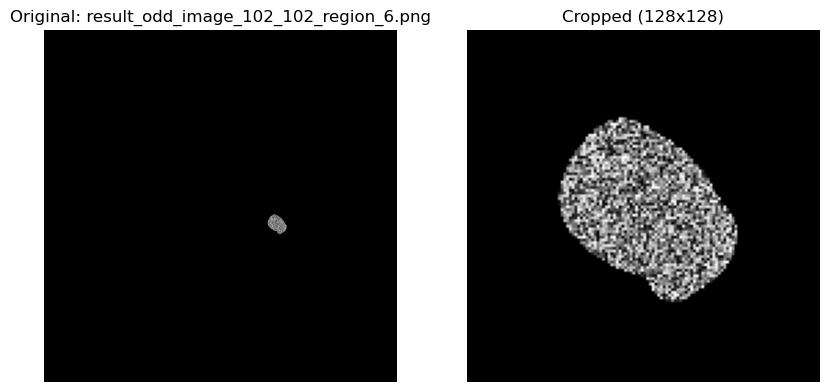

Saved cropped image: A:\3rd_Year_Project\Project_code\data\Resized_128x128\result_odd_image_102_102_region_6.png_cropped.png


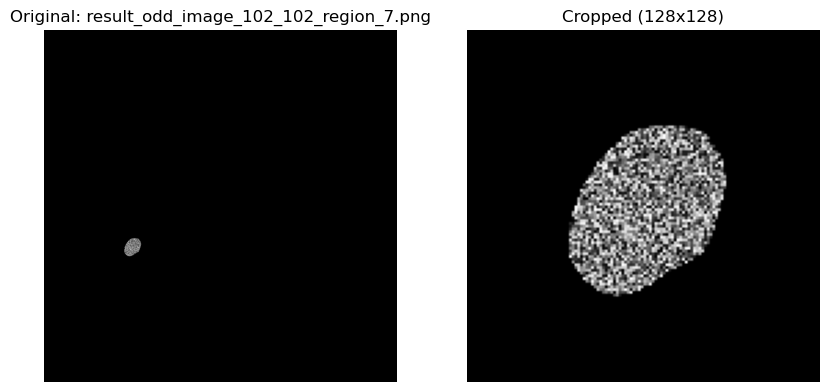

Saved cropped image: A:\3rd_Year_Project\Project_code\data\Resized_128x128\result_odd_image_102_102_region_7.png_cropped.png


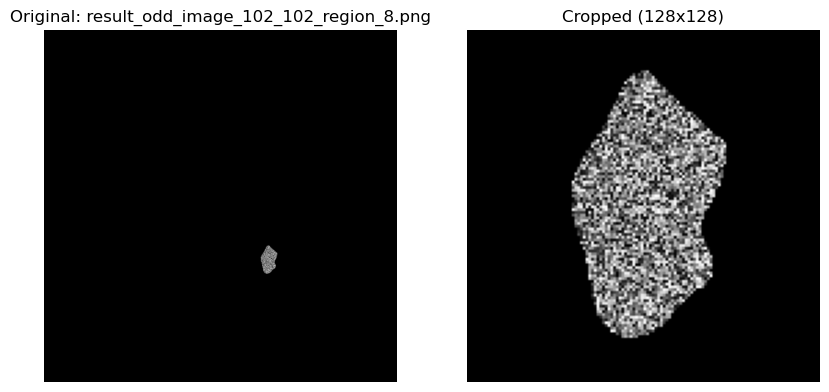

Saved cropped image: A:\3rd_Year_Project\Project_code\data\Resized_128x128\result_odd_image_102_102_region_8.png_cropped.png


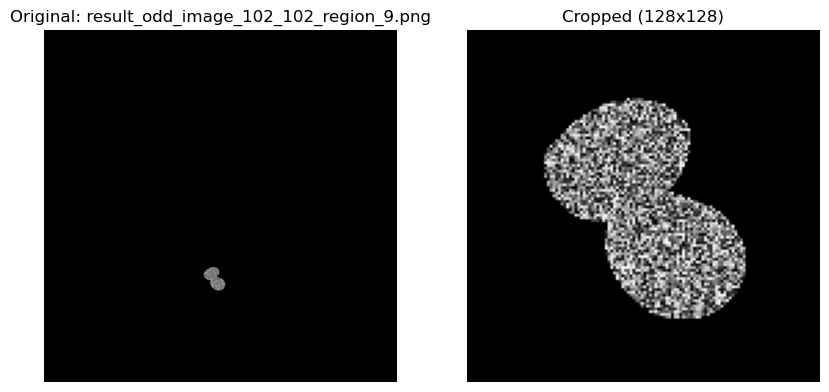

Saved cropped image: A:\3rd_Year_Project\Project_code\data\Resized_128x128\result_odd_image_102_102_region_9.png_cropped.png


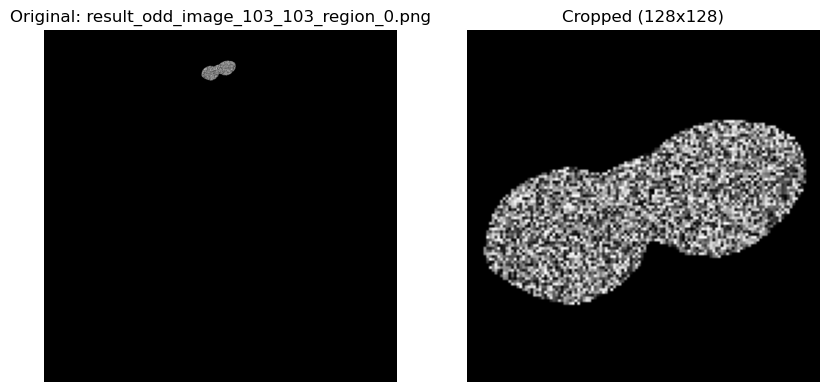

Saved cropped image: A:\3rd_Year_Project\Project_code\data\Resized_128x128\result_odd_image_103_103_region_0.png_cropped.png


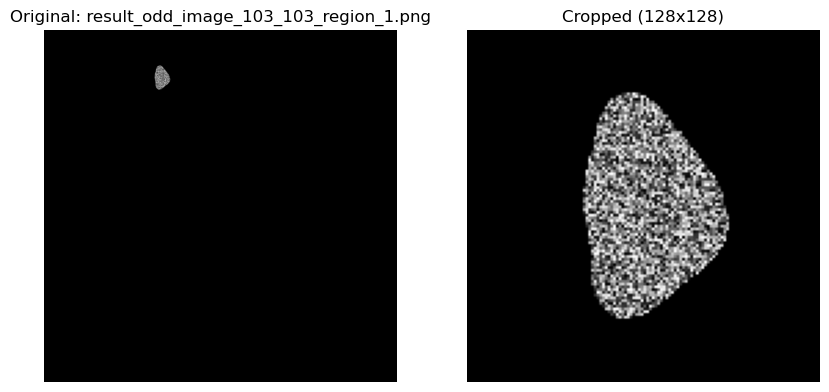

Saved cropped image: A:\3rd_Year_Project\Project_code\data\Resized_128x128\result_odd_image_103_103_region_1.png_cropped.png


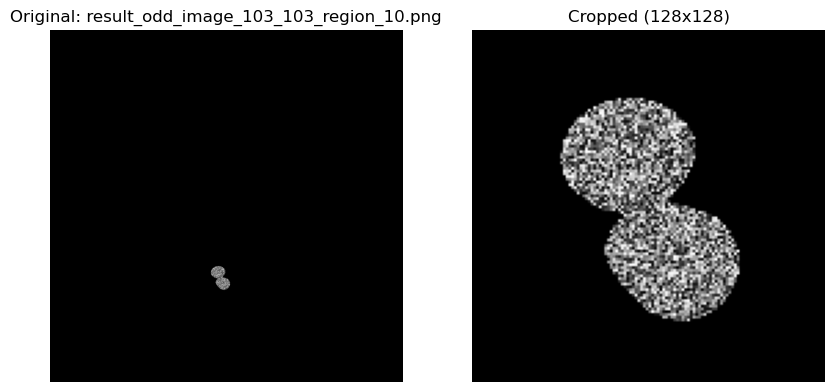

Saved cropped image: A:\3rd_Year_Project\Project_code\data\Resized_128x128\result_odd_image_103_103_region_10.png_cropped.png


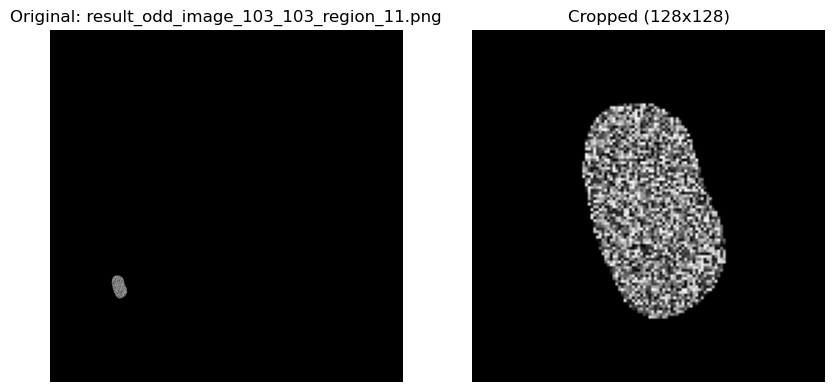

Saved cropped image: A:\3rd_Year_Project\Project_code\data\Resized_128x128\result_odd_image_103_103_region_11.png_cropped.png


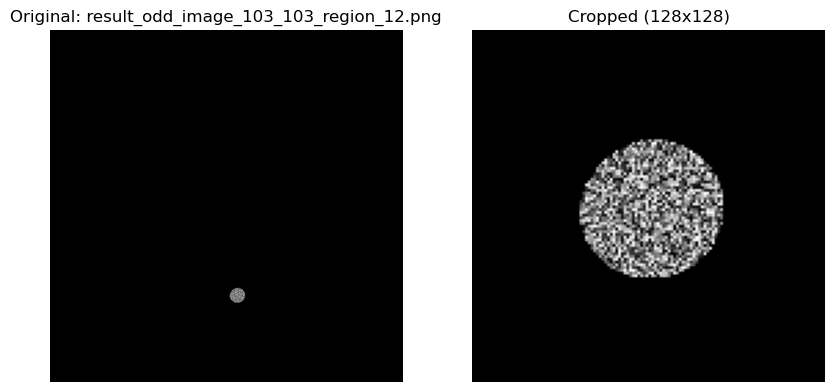

Saved cropped image: A:\3rd_Year_Project\Project_code\data\Resized_128x128\result_odd_image_103_103_region_12.png_cropped.png


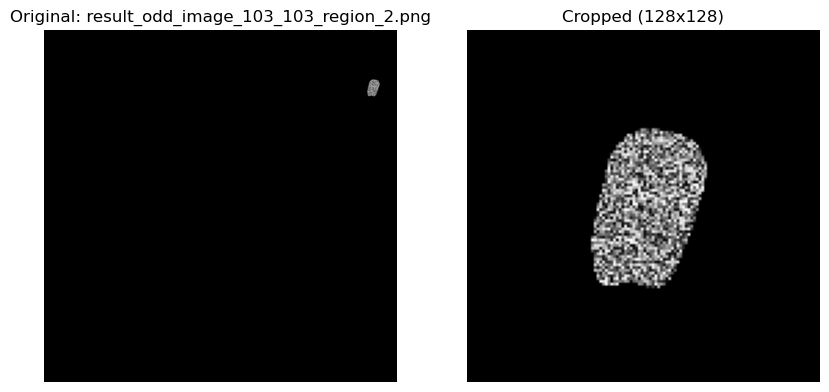

Saved cropped image: A:\3rd_Year_Project\Project_code\data\Resized_128x128\result_odd_image_103_103_region_2.png_cropped.png


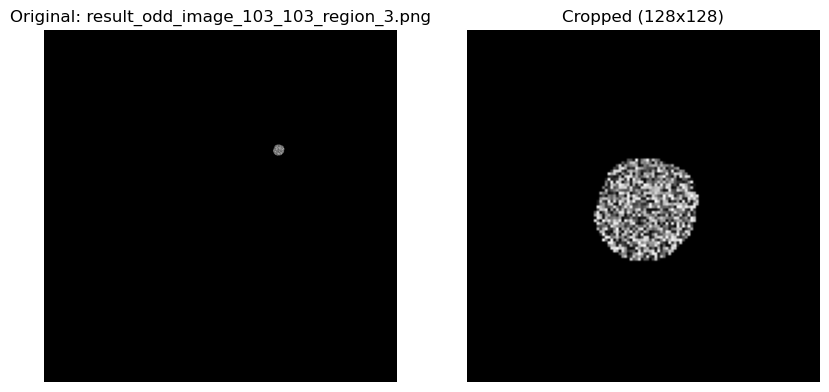

Saved cropped image: A:\3rd_Year_Project\Project_code\data\Resized_128x128\result_odd_image_103_103_region_3.png_cropped.png


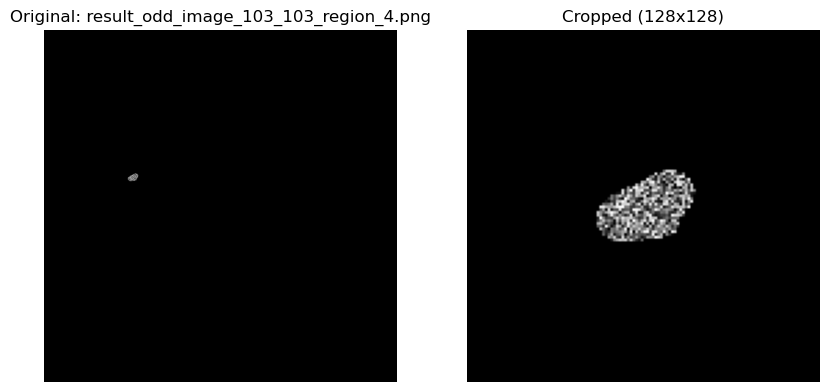

Saved cropped image: A:\3rd_Year_Project\Project_code\data\Resized_128x128\result_odd_image_103_103_region_4.png_cropped.png


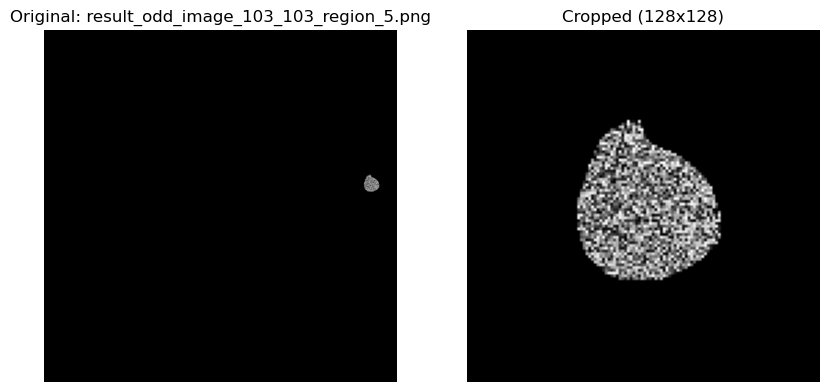

Saved cropped image: A:\3rd_Year_Project\Project_code\data\Resized_128x128\result_odd_image_103_103_region_5.png_cropped.png


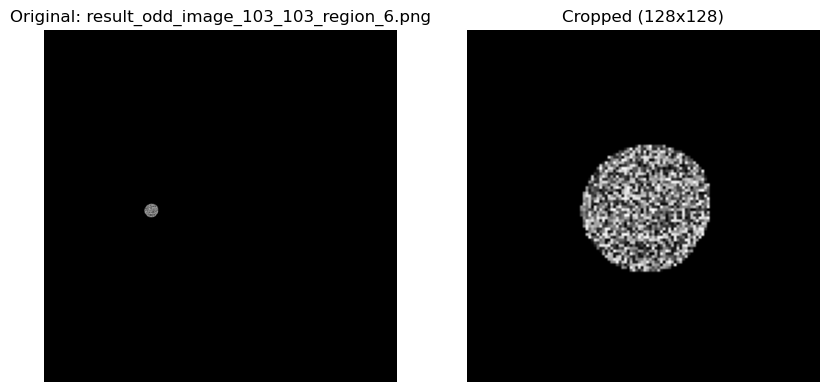

Saved cropped image: A:\3rd_Year_Project\Project_code\data\Resized_128x128\result_odd_image_103_103_region_6.png_cropped.png


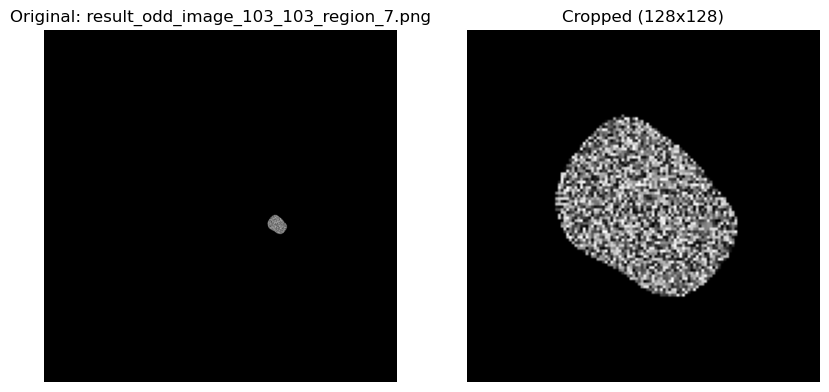

Saved cropped image: A:\3rd_Year_Project\Project_code\data\Resized_128x128\result_odd_image_103_103_region_7.png_cropped.png


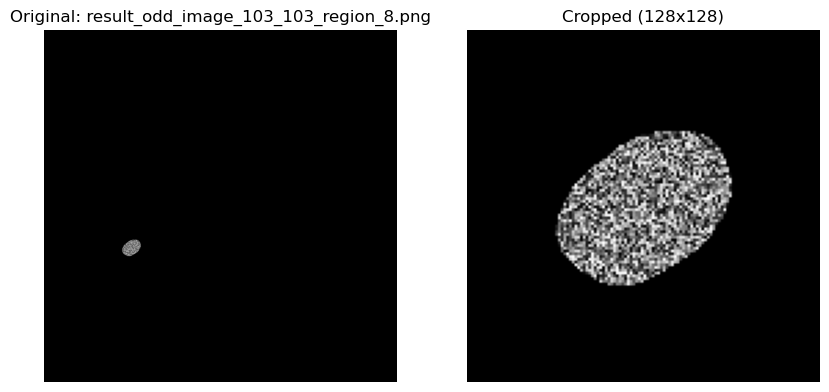

Saved cropped image: A:\3rd_Year_Project\Project_code\data\Resized_128x128\result_odd_image_103_103_region_8.png_cropped.png


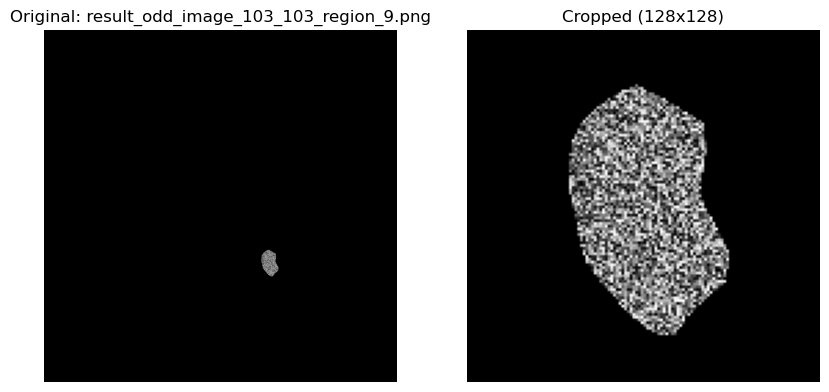

Saved cropped image: A:\3rd_Year_Project\Project_code\data\Resized_128x128\result_odd_image_103_103_region_9.png_cropped.png


OSError: Could not find a backend to open `A:\3rd_Year_Project\Project_code\data\Multiplied_Isolated_Not_resized_amoeba\result_odd_image_104.png_269_region_2.png.png`` with iomode `r`.
Based on the extension, the following plugins might add capable backends:
  pyav:  pip install imageio[pyav]

In [12]:
# Define input and output folders
output_folder = r"A:\3rd_Year_Project\Project_code\data\Multiplied_Isolated_Not_resized_amoeba"
resized_output_folder = r"A:\3rd_Year_Project\Project_code\data\Resized_128x128"

# Define crop size
crop_size = 128
half_size = crop_size // 2

# Process all files in the folder
for region_filename in os.listdir(output_folder):
    region_path = os.path.join(output_folder, region_filename)

    # Ensure it's a file (skip directories)
    if not os.path.isfile(region_path):
        continue

    # Load image
    region_image = imread(region_path, as_gray=True)

    # Compute center of mass
    center_y, center_x = center_of_mass(region_image)
    center_y, center_x = int(center_y), int(center_x)

    # Define cropping bounds
    y_min = max(center_y - half_size, 0)
    y_max = min(center_y + half_size, region_image.shape[0])
    x_min = max(center_x - half_size, 0)
    x_max = min(center_x + half_size, region_image.shape[1])

    # Adjust if near edges
    if y_max - y_min < crop_size:
        y_min = max(y_max - crop_size, 0)
        y_max = min(y_min + crop_size, region_image.shape[0])

    if x_max - x_min < crop_size:
        x_min = max(x_max - crop_size, 0)
        x_max = min(x_min + crop_size, region_image.shape[1])

    # Crop the image
    cropped_image = region_image[y_min:y_max, x_min:x_max]

    # Save with new filename
    resized_output_path = os.path.join(resized_output_folder, f"{region_filename}_cropped.png")
    imsave(resized_output_path, cropped_image)

    # Optional: Display the images
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    axes[0].imshow(region_image, cmap='gray')
    axes[0].set_title(f"Original: {region_filename}")
    axes[0].axis("off")

    axes[1].imshow(cropped_image, cmap='gray')
    axes[1].set_title("Cropped (128x128)")
    axes[1].axis("off")

    plt.show()

    print(f"Saved cropped image: {resized_output_path}")

print("Processing completed.")